In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
X = np.array([[6],[8],[10],[14],[18]]).reshape(-1,1) #X表示我们的训练数据的特征，即披萨的直径
y = [7, 9, 13, 17.5, 18]                             #y是一个表示披萨价格的向量

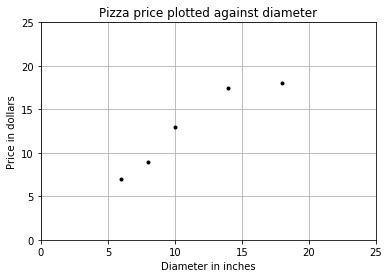

In [8]:
plt.figure()
plt.title('Pizza price plotted against diameter')
plt.xlabel('Diameter in inches')
plt.ylabel('Price in dollars')
plt.plot(X, y, 'k.')
plt.axis([0,25,0,25])
plt.grid(True)
plt.show()

使用matplotlib作图来将训练数据可视化

In [10]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

创建一个估计器实例，用训练数据拟合模型

In [13]:
test_pizza = np.array([[12]])
predicted_price = model.predict(test_pizza)[0]
print('A 12" pizza should cost:$%.2f' % predicted_price)

A 12" pizza should cost:$13.68


预测一个直径之前从未见过的披萨的价格

#### LinearRegression类是一个估计器
估计器基于观测到的数据预测一个值
#### 在sklearn中，所有的估计器都实现了fit方法和predict方法
前者用于学习模型的参数，后者使用学习到的参数来预测一个解释变量对应的响应变量值
#### LinearRegression的fit方法学习了（公式2.1）简单线性回归模型
利用训练数据学习产生最佳拟合模型的简单线性回归的参数值称为普通最小二乘（OLS）或线性最小二乘。

## **用代价函数评价模型的拟合性**

通过最小化残差的和来生成模型，这种衡量模型的方法叫做残差平方和（RSS）代价函数

In [15]:
print('Residual sum of square :%.2f' % np.mean((model.predict(X)-y) **2))

Residual sum of square :1.75


现在我们有一个代价函数，可以通过求这个函数的极小值来找到模型的参数值。

## **求解简单线性回归的OLS**

简单线性回归由方程y=α+βx给出，而我们的目标是通过求代价函数的极小值来求解β和α的值。
首先我们要解出β值，为了达到目的，我们要将计算x的方差以及x和y的协方差。

In [16]:
import numpy as np

In [17]:
X = np.array([[6],[8],[10],[14],[18]]).reshape(-1,1)
x_bar = X.mean()
print(x_bar)
#注意我们在计算样本方差的时候将样本的数量减去1
#这项技巧称为贝塞尔校正，它纠正了对样本中总体方差估计的偏差
variance=((X-x_bar)**2).sum() / (X.shape[0]-1)
print(variance)

11.2
23.2


Numpy库也提供了一个叫做var的方法来计算方差。计算样本方差时关键字参数ddof可以设置贝塞尔校正。

In [18]:
print(np.var(X,ddof=1))

23.2


#### 协方差用来衡量两个变量如何一同变化
如果变量一起增加，它们的协方差为正  
如果一个变量增加另一个变量减少，它们的协方差为负  
如果两个变量之间没有线性关系，它们的协方差为零，它们是线性无关的但不一定是相互独立的

In [19]:
y=np.array([7,9,13,17.5,18])
y_bar=y.mean()
#我们将x转置，因为所有操作都必须是行向量
convariance=np.multiply((X-x_bar).transpose(),y-y_bar).sum()/(X.shape[0]-1)
print(convariance)
print(np.cov(X.transpose(),y)[0][1])

22.65
22.65


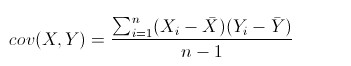

现在我们已经计算出了解释变量的方差以及解释变量和响应变量之间的协方差  
β= con（x，y）/ var（x）  
α= 平方y - β* 平方x

## 评价模型

我们已经使用了一种学习算法从训练数据中估计出了模型的参数，  
我们如何评估模型是否很好地表达了现实中解释变量和响应变量之间的关系呢？  
我们可以使用一些衡量方法来评估模型的预测能力。
在此我们使用一种叫做R方的方法来评估披萨价格预测器。  
#### R方，也被称为决定系数，它用来衡量数据和回归线的贴近程度。  
计算R方的方法有多种，在简单线性回归模型中，R方等于皮尔森积差相关系数（PPMCC）的平方，也被称为皮尔森相关系数r的平方。

In [21]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [22]:
X_train = np.array([6,8,10,14,18]).reshape(-1,1)
y_train =[7,9,13,17.5,18]

In [23]:
X_test= np.array([8,9,11,16,12]).reshape(-1,1)
y_test= [11,8.5,15,18,11]

In [25]:
model =LinearRegression()
model.fit(X_train,y_train)
r_squared=model.score(X_test,y_test)
print(r_squared)

0.6620052929422553
